# 📘 SciPy for Scientific Computing

SciPy is a powerful Python library built on top of NumPy. It provides tools for scientific and technical computing, including optimization, integration, interpolation, linear algebra, and statistics.

In [1]:
import numpy as np
from scipy import stats, integrate, optimize

## 🎯 Example 1: Solving Equations

In [2]:
from scipy.optimize import fsolve

def equation(x):
    return x**2 - 4

root = fsolve(equation, x0=2)
print("Root:", root)

Root: [2.]


## 📈 Example 2: Integration

In [3]:
from scipy.integrate import quad

result, error = quad(lambda x: x**2, 0, 1)
print("Integral result:", result)

Integral result: 0.33333333333333337


## 🔁 Example 3: Interpolation

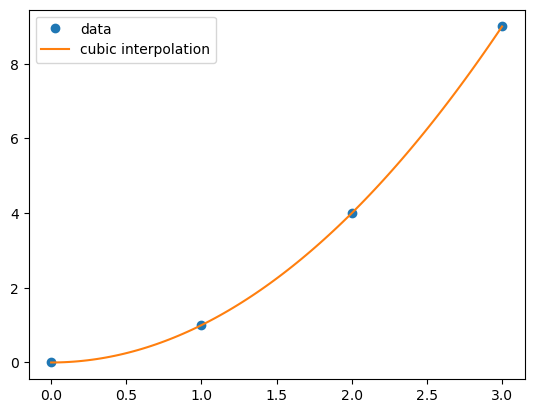

In [4]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 4, 9])

f = interp1d(x, y, kind='cubic')
x_new = np.linspace(0, 3, 100)
y_new = f(x_new)

plt.plot(x, y, 'o', label='data')
plt.plot(x_new, y_new, '-', label='cubic interpolation')
plt.legend()
plt.show()

## 📊 Example 4: Statistical Tests

In [5]:
data = np.random.normal(loc=0, scale=1, size=1000)

# Perform a t-test
t_stat, p_value = stats.ttest_1samp(data, popmean=0)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 0.9493099731786437
P-value: 0.3426925723722509


## 🧪 Practice Challenge

Use `scipy.optimize` to find the minimum of the function $f(x) = x^2 + 2x + 1$.

In [6]:
from scipy.optimize import minimize

def f(x):
    return x**2 + 2*x + 1

result = minimize(f, x0=0)
print("Minimum at:", result.x)

Minimum at: [-1.00000001]


## ✅ Summary

- `scipy.optimize` → root finding, minimization
- `scipy.integrate` → definite integrals
- `scipy.interpolate` → interpolation
- `scipy.stats` → distributions and hypothesis testing

> SciPy is ideal for scientific research, modelling, and data analysis when paired with NumPy and Matplotlib.